# 回帰の概要

この章では、回帰分析のモチベーションについて説明するとともに、必要となる基礎について幾つか語句や表式を整理しておこう。

## 回帰分析

:::{margin} 回帰
回帰分析で用いられる"回帰"という用語は、原義とは異なり歴史的な経緯から来ている。
詳しくは[Wikipedia](https://ja.wikipedia.org/wiki/回帰分析)に譲る。
:::
皆さんは普段から「ボールがあのへんに落ちそうだな」「対向車のスピードがそこそこ速いから、いま右折するとぶつかっちゃうな」
「株価が予測できれば儲けられそうだな」といった具合に、多かれ少なかれ経験やデータに基づいた予測を行っている。  
実生活はもちろん、学術分野や産業界でも日々否応なしにこうした予測の必要に迫られることだろう。
たとえばあなたが会社経営者なら「*需要を正しく見積もって、廃棄が出ないように商品を入荷したい*」といったことを考えるはずだ。

:::{margin} データのベクトル表記
$\boldsymbol{x}_n,\boldsymbol{t}_n $は一般に複数成分を持つベクトルのつもりで太字にしてある
:::
回帰分析の目標は、$N$個の観測点$\{ \boldsymbol{x}_n \} (n=1,\ldots,N)$と興味のある観測値$\{\boldsymbol{t}_n \}$があったとき
未知の点$\boldsymbol{x}$での値$\boldsymbol{t}$の値を予測することである。観測点と観測値の例をあげよう。
- 観測点/興味のある量ともに1次元の例: 日時におけるある銘柄の株価
- 観測点/興味のある量ともに2次元の例: 緯度・経度に対する標高と年間雨量

「観測されたデータの振る舞いを説明したり予測したい」「データの背景にある基本原理・物理法則のようなものを明らかにしたい」というのは人間の特性であり知性である。
一方で、データの背後にある真の関数や因果関係を知ることは一般には極めて困難(ときには不可能)である。

そこで我々人類が取るべき、あるいはこれまで取ってきた戦略は「**なるべく尤もらしいモデルを作って、それを予測に使う**」というものだ。
この意味で、回帰によらずデータ分析とは多くの場合「特定のモデル(考え方,立場,仮定, etc.)を採用すること」であり、その選択は必ずしも唯一である必要はない。

自然科学の領域で得られるデータというのは(例外はあるが)一般的には再現性が高く、
観測・計測からくる誤差などもわりと自然に考慮できるため、回帰分析などの手法を学習・適用する上での教科書的な例と言える。
また、特定の観測量に影響を与える量(説明変数)についても予めある程度分かっている場合もある。

:::{margin} オームの法則
実際には電気抵抗$R$は温度に依存したりするため厳密には定数ではないため、オームの法則という比例関係はあくまで$I,R,V$の関係を(ほとんど)説明する近似に過ぎない。
:::
一例を挙げよう。「電気回路の2点間の電位差は2点間に流れる電流に比例する」という**オームの法則**は$V = IR$と書くことが出来て
「電気抵抗$R$が既知の定数ならば、未知の電流$I'$を流した際の電位差$V'$は$I'R$(+誤差)で与えられるだろう」と予測ができる。
このような法則性は人類によって長年蓄積された経験とデータによって"尤もらしい"事がわかっているため**法則**として教科書にも載っている。

一方で、「各都道府県における感染症Cの罹患人数」「組織における意思決定・取り組みの効果」など社会や経営/組織運営などで得られるデータは、様々な因子が複雑に絡み合っている上に、条件を変えて対照実験を行うといったことが困難なため、前述のようなデータよりも分析の難易度が数段上がる。

もし皆さんが「予測」という言葉を見聞きした際に「どのような仮定・モデルをおいているのだろう？」という疑問が思い浮かんだり
「完璧なモデルは一般に存在しない」という認識を有していれば、皆さんには既にデータ分析に対する基本的なリテラシーが身についていると言って差し支えないだろう。




### 単回帰: 1次元の直線回帰

もっとも単純な回帰の例としては、上のオームの法則のように、興味のある量(目的変数,従属変数などと呼ぶ)とそれを決定づける量(説明変数,独立変数などと呼ぶ)がそれぞれ1つずつ(単回帰と呼ぶ)で
互いに比例関係にあるもの(直線回帰)がある。

もしも手元にあるデータが比例関係に従うと仮定すると$t$(目的変数)と$x$(説明変数)の関係は以下のように与えられる:
$ t = a x + b$
ここで、$a$は$x$と$t$の間の比例係数で$b$(y切片)は比例関係からのずれを表す定数である。


例えば以下のようなデータ($x$と$y$)があったとする。

In [2]:
import numpy as np
x = np.array([0, 20, 40, 60, 80, 100])
y = np.array([273.15, 293.15, 313.15, 333.15, 353.15, 373.15])

まずplotしてみよう。

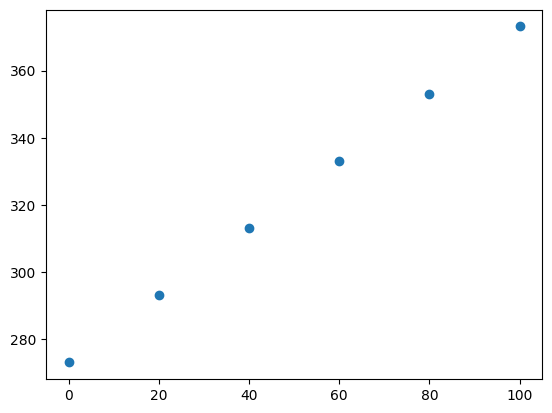

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x, y)   

この両者の関係は比例関係にあると言えそうだ。

直線の係数$a,b$の"最適値"を**最小二乗法**、つまり誤差の二乗和を最小化するように求めることを考える。

$$
L \equiv \sum_{i=1}^n (y_i - (ax_i + b))^2
$$

これを$a,b$について微分して0とおく(極値を求めるための式を書く)と、
$$
\sum_{i=1}^n (y_i - (ax_i + b))x_i = 0 \\
\sum_{i=1}^n (y_i - (ax_i + b)) = 0
$$
となる。これを解くと、
$$
a = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}\\
b = \bar{y} - a \bar{x}
$$
となる。

Exercise: 単回帰分析の係数の最適値を求める式を導出せよ。

In [5]:
def eval_coeff_1d(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    n = len(x)
    a = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar) ** 2)
    b = ybar - a * xbar
    return a, b

a,b = eval_coeff_1d(x, y)
print("a = ", a, "b = ", b)

# １次式の最適化を行うpolyfit関数を使う
a_np, b_np = np.polyfit(x, y, 1)
print("a = ", a_np, "b = ", b_np)


a =  1.0 b =  273.15000000000003
a =  0.9999999999999997 b =  273.15000000000003


解答1. 

$$
\bar{x} = \sum_{i=1}^n x_i \\
\bar{y} = \sum_{i=1}^n y_i \\
0 = \sum_{i=1}^n (y_i - (ax_i + b))  = n \bar{y} - a n \bar{x} - b n 
$$ 
から
$$
b = \bar{y} - a \bar{x}
$$
が得られる。次に、1式目を変形していこう。

$$
\sum^n_{i=1} ( y_i - \bar{y} ) x_i + a \bar{x} x_i -a x^2_i = 0
$$

$$
0 = \sum_{i=1}^n (y_i x_i - a x^2_i - \bar{y}x_i + a \bar{x}x_i) = 
\sum_{i=1}^n ( (y_i - \bar{y})(x_i - \bar{x}) + \bar{x}y_i - \bar{x}\bar{y} - a (x_i - \bar{x})^2 )= 0
$$
ここで、$\bar{x}y_i - \bar{x}\bar{y}$は、和を取ると0になるので
$$
a = \frac{\sum_{i=1}^n ( (y_i - \bar{y})(x_i - \bar{x})  }{\sum^n_{i=1} (x_i - \bar{x})^2 }
$$
